In [120]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs 
from sklearn.metrics import silhouette_score

In [3]:
np.set_printoptions(threshold=100000)
X, y = make_blobs(n_samples=1000, n_features=2, random_state=42)

In [122]:
class KMeans:
    def __init__(self, k: int) -> None:
        self.k = k
        self.centroids = []
        
    def fit(self, X: np.ndarray, training_epochs:int=100) -> None:
        self.labels = np.zeros(X.shape[0])
        cluster_variances = []
        label_dict = {}
        
        for epoch in range(training_epochs):
            for i in range(0, self.k):
                label_dict[i] = []

            for i in range(X.shape[0]):
                distances = []

                for j in range(self.centroids.shape[0]):
                    distances.append(np.linalg.norm(X[i] - self.centroids[j]))

                self.labels[i] = np.argmin(distances)
                label_dict[np.argmin(distances)].append(i)

            ax_mean = []
            for key, vals in label_dict.items():
                vals = np.array(vals)
                
                cluster_variances.append(self.get_cluster_variance(X[vals]))
                
                for a in range(X.shape[1]):
                    ax_vals = X[vals]
                    ax_mean.append(np.mean(ax_vals[:,a]))

            self.centroids = np.array(ax_mean).reshape(-1, 2)
        print(self.centroids)
        
        
        return cluster_variances
                
    def get_cluster_variance(self, points: np.ndarray) -> float:
        return np.var(points)
        
    def init_centroids(self, X: np.ndarray) -> np.ndarray:
        self.centroids.append(X[np.random.randint(0, X.shape[0])])
        
        for i in range(self.k - 1):
            distances = np.array([])
            
            for d in range(X.shape[0]):
                distances = np.append(distances, np.linalg.norm(X[d] - self.centroids[-1]))
            
            distances = (distances - min(distances)) / (max(distances) - min(distances))
            distances = distances / sum(distances)
                    
            self.centroids.append(X[np.random.choice(range(0, X.shape[0]), size=1, replace=True, p=distances)][0])
        self.centroids = np.array(self.centroids, dtype=object)

[[-2.52414179  9.00394283]
 [ 4.7286341   2.05557266]
 [-6.86656253 -6.78519427]]


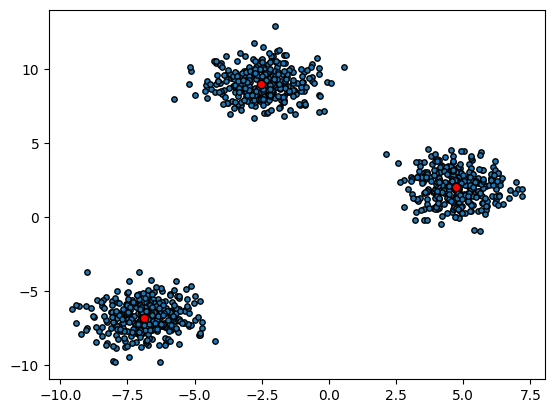

In [131]:
kmeans = KMeans(k=3)
kmeans.init_centroids(X)

plt.scatter(X[:,0], X[:,1], edgecolors='black', s=15, zorder=1);
variances = kmeans.fit(X, training_epochs=5000)
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:, 1], c='red', edgecolors='black', zorder=2);

In [135]:
silhouette_score(y.reshape(-1, 1), kmeans.labels)

1.0